In [25]:
import pandas as pd
import numpy as np

# Adım 1: Veriyi oku
data = pd.read_csv("temizlenmis_veri.csv")


In [27]:
from sklearn.preprocessing import LabelEncoder
# Adım 2: '?' olanları NaN yap ve satırları düşür
data = data.replace('?', np.nan).dropna()

# Adım 3: Sayısal olmayan sütunları etiketle
non_numeric_cols = data.select_dtypes(include='object').columns
label_encoders = {}
for col in non_numeric_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Adım 4: Özellik ve hedef ayrımı
data = data.drop(columns=["survival_time"])
X = data.drop(columns=["survival_status"])
y = data["survival_status"].astype(int)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# Adım 5: Veriyi eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Adım 6: SVM modelini oluştur ve eğit
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Adım 7: Tahmin yap ve doğruluk oranını yazdır
y_pred = svm_model.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("SVM Model Doğruluk Oranı: %", round(accuracy * 100, 2))

SVM Model Doğruluk Oranı: % 37.21


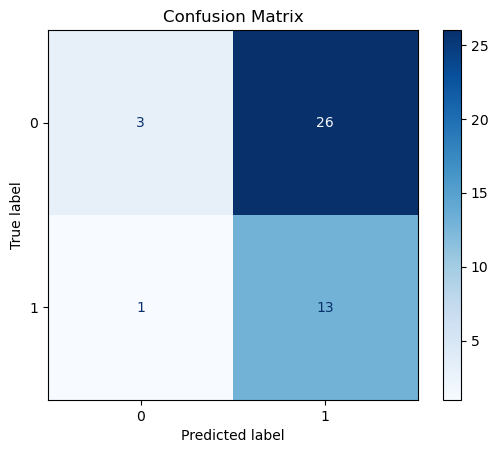

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [35]:
import pickle

# Modeli kaydet
with open("SVM_model.pkl", "wb") as f:
    pickle.dump(svm_model, f)